### The Weighted MEAN And The Median

#### Different Weights
The fact that we have different number of houses sold each year, the mean of sale prices for each individual year weighs differently in the overall mean. But when we computed the mean of the **Mean Price** column, we gave each year the same weight because we added all the five mean prices and then divided by 5.
To understand why it's wrong to give each year an equal weight, let's begin thinking of the problem on a smaller scale. 
Consider these two samples of n=5 and n=2 (remember that n
gives the number of sample points) which contain sale prices for year 2009 and 2010:

**2009:[28 700,142 500,440 000,336 860,207 500]**

**2010:[135 000,139 000]**

To find the mean across years 2009 and 2010, we can add the five prices for 2009 with the two prices for 2010, and then divide by 7 (because we have 7 prices in total)
![title](./img/mean/2_Wmean.png)

Notice in the numerator that year **2009** has a greater contribution 
**(1413860)** than year **2010 (274000)**. If we took instead the mean for each year individually, add the two means and divide their sum by 2, then we'd give each year the same weight. This is wrong, and it leads to a wrong result for the overall mean:
![title](./img/mean/3_Wmean.png)

In [1]:
import pandas as pd

data = {'Year':[2006, 2007, 2008, 2009, 2010],
        'Mean Price':[181761.648000, 185138.207493, 178841.750804, 181404.567901, 172597.598240],
        'Houses Sold':[625, 694, 622, 648, 341]
}

houses_per_year = pd.DataFrame(data)
houses_per_year

houses = pd.read_table('./datasets/AmesHousing_1.txt')
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,131770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


To compute the correct overall mean

* Using only the data we have in the houses_per_year data set, compute the sum of prices for each year.
* Add all the sums together.
* Divide the final sum by the total number of houses sold. Assign the result to a variable named weighted_mean.
* Compute again the mean of the SalePrice column in the houses data set. Assign the value to a variable named mean_original.
* Round each mean value to 10 decimal places to get rid of minor rounding errors and then measure the difference between the two means. Assign the result to a variable named difference. If the two means are equal, you should get a difference of 0.


In [2]:
houses_per_year['sum_per_year'] = houses_per_year['Mean Price'] * houses_per_year['Houses Sold']

all_sums_together = houses_per_year['sum_per_year'].sum()
total_n_houses = houses_per_year['Houses Sold'].sum()

weighted_mean = all_sums_together / total_n_houses
mean_original = houses['SalePrice'].mean()

difference = round(mean_original, 10) - round(weighted_mean, 10)

print('Mean_original - ', mean_original)
print('Weighted_mean - ', weighted_mean)
print('Difference - ', difference)

Mean_original -  180796.0600682594
Weighted_mean -  180796.0600682314
Difference -  2.7997884899377823e-08


#### The Weighted MEAN

When we take into account the different weights and compute the mean like we did in the previous exercise, we call that mean the weighted mean. Just as the arithmetic mean we learned about in the previous mission, the weighted mean can be easily defined algebraically.

In the previous exercise, we compute the weighted mean for this distribution of sample means:

**[181761.648,185138.2074928,178841.75080386,181404.56790123,172597.59824047]**

We multiplied each value by the number of houses sold in that year to take into account the different weights, then we summed up the products and divided by the total number of houses. This is the distribution of weights we used:

**[625,694,622,648,341]**

Now imagine that instead of the actual values, we have six unknown prices, which we'll abbreviate with x
, and six unknown corresponding weights which we'll abbreviate with w:

**[x1,x2,x3,x4,x5,x6]**

**[w1,w2,w3,w4,w5,w6]**

![title](./img/mean/Wmean_4.png)
![title](./img/mean/Wmean_5.png)
![title](./img/mean/Wmean_6.png)

In [8]:
# Write a function that computes the weighted mean for any array of numbers.
from numpy import average

def compute_weighted_mean(meanvalues_arr, weights_arr):
    sum_w = []

    for mean, weight in zip(meanvalues_arr, weights_arr):
        sum_w.append(mean * weight)
    
    wmean = sum(sum_w) / sum(weights_arr)
    
    return wmean

weighted_mean_function = compute_weighted_mean(houses_per_year['Mean Price'],
                                       houses_per_year['Houses Sold'])
print('Weighted_mean_function - ', weighted_mean_function)

weighted_mean_numpy = average(houses_per_year['Mean Price'], weights = houses_per_year['Houses Sold'])
print('Weighted_mean_numpy - ', weighted_mean_numpy)

equal = round(weighted_mean_function, 10) == round(weighted_mean_numpy, 10)
equal

Weighted_mean_function -  180796.0600682314
Weighted_mean_numpy -  180796.0600682314


True

#### The Median for Open-ended Distributions
While learning about the weighted mean we saw that there are distributions where it's possible to compute the mean, although that wouldn't be correct. There are distributions, however, where it's impossible to compute the mean. Consider for instance the frequency distribution of the **TotRms AbvGrd** variable, which describes the number of rooms above ground.
The lowest boundary of the distribution is well-defined — the lowest value is 2 and no value in the distribution can be lower than that. But the upper boundary is not defined as precisely — the highest value is "10 or more" which means that houses can actually have 10, 11, 15, or even more rooms. The upper boundary ("10 or more") is thus open, and for this reason we say that the TotRms AbvGrd variable has an **open-ended distribution**.

In [9]:
print(houses['TotRms AbvGrd'].value_counts())

6             844
7             649
5             586
8             347
4             203
9             143
10 or more    131
3              26
2               1
Name: TotRms AbvGrd, dtype: int64


![title](./img/median/1_median.png)


#### Distributions with Even Number of Values

![title](./img/median/2_median.png)

Unlike the mean, the median doesn't have a neat way to be defined algebraically. This is because sorting a distribution in an ascending order and then choosing a middle value or two doesn't involve any arithmetic. The different treatment for odd and even-numbered distributions also poses some theoretical challenges for constructing a single definition.

In [12]:
# Find the median value of the TotRms AbvGrd column.
rooms_abv_grnd = houses['TotRms AbvGrd'].copy()
rooms_abv_grnd = rooms_abv_grnd.replace({'10 or more':10})
rooms_abv_grnd = rooms_abv_grnd.astype(int)
rooms_abv_grnd_sorted = rooms_abv_grnd.sort_values()

# Find the median
middle_indices = [int((len(rooms_abv_grnd_sorted) / 2) - 1),
                  int((len(rooms_abv_grnd_sorted) / 2))] # len - 1 and len because Series use 0-indexing

middle_values = rooms_abv_grnd_sorted.iloc[middle_indices]# make sure you don't use loc[]
median = middle_values.mean()  
median                

6.0

#### The Median as a Resistant Statistic

When we compute the mean, we account equally for each value in the distribution — we sum up all the values in the distribution and then divide the total by the number of values we added. When we compute the median, however, we don't consider equally each value in the distribution. In fact, we only consider the middle value (or the middle two values).

This property makes the median more resistant to changes in the data compared to the mean. Let's consider this simple distribution:

**[2,3,5,5,10]**

Both the median and the mean of this distribution are 5. Let's change the last value in the distribution from 10 to 1000:

**[2,3,5,5,1000]**

The median is still 5, but the mean is now 203. This is because the mean takes into account every value in the distribution, while the median considers only the middle value. Because the median is so resistant to changes in the data, it's classified as a resistant or robust statistic.

This property makes the median ideal for finding reasonable averages for distributions containing outliers. Consider this distribution of annual salaries for five people in a company:

**[20 000, 34 000, 40 000, 45 000, 800 000]**

![title](./img/median/2_5_median.png)

![title](./img/median/3_median.png)

The **Lot Area** and **SalePrice** variables have **outliers**. Confirm this information by visualizing the distributions using a box plot. Remember from the previous course that outliers will appear as **dots** on the graph.

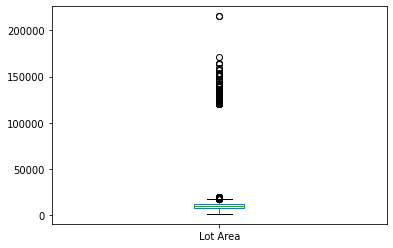

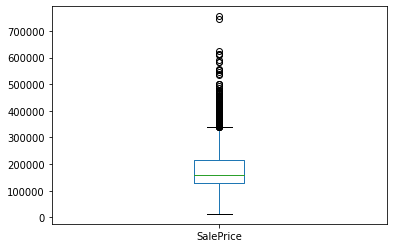

In [16]:
import matplotlib.pyplot as plt

houses['Lot Area'].plot.box()
plt.show()

houses['SalePrice'].plot.box()
plt.show

lotarea_difference = houses['Lot Area'].mean() - houses['Lot Area'].median()
saleprice_difference = houses['SalePrice'].mean()-houses['SalePrice'].median()

#### The Median for Ordinal Scales

Data points belonging to ordinal variables are often coded using numbers. Consider the frequency distribution of the Overall Cond variable, which rates the overall condition of a house. In the [documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt), we can find that each numerical value corresponds to a specific quality level.

![title](./img/median/median_4.png)

In [17]:
print(houses['Overall Cond'].value_counts().sort_index())

1       7
2      10
3      50
4     101
5    1654
6     533
7     390
8     144
9      41
Name: Overall Cond, dtype: int64


Because words like "fair" or "average" are coded with numbers, it becomes mathematically possible to compute the mean. But whether or not it's theoretically sound to compute the mean for ordinal variables is contentious. Below we explore one argument against computing the mean, and in the next screen we'll explore an argument that supports the idea of using the mean.

Remember from the previous course that if two data points are measured on an ordinal scale and there's a difference between them, we can tell the direction of the difference, but we don't know the size of the difference.

![title](./img/median/median_5.png)

Suppose the house's overall condition is rated with an 8 (Very good), and another house gets a 4 (Below average). In that case, we can't say that the former's conditions are twice as better as the latter. The most we can say is that the house which got an 8 has better conditions (we can't quantify how much better — it could be twice as better, three times as better, 1.5 times as better, we simply don't know).

This should be more clear if we consider the fact that the numbers used to encode the quality levels ("Poor", "Fair", "Good", etc.) are chosen arbitrarily. Instead of numbers from 1 to 10, we could have numbers from 30 to 40, or from 50 to 70 in steps of 2, or from 0 to 9

Inside the framework of a 0-9 system, a "Very good" label would be encoded as a 7, and a "Below average" as a 3. If we took ratios, we'd reach different conclusions for different encoding systems:
* For a 1-10 encoding system, the conditions of an "Very good" (8) house would be twice as better than those of a "Below average" (4) house (8/4=2).
* For a 0-9 encoding system, the same "Very good" (7) house would have conditions that are 2.¯3 times as better as the conditions of a "Below average" (3) house (73=2.¯3). As a short parenthesis, 2.¯3 is the abbreviation for 2.333...333...(where 3 is infinitely repeating).

It can be argued thus that the numerical values of an ordinal variable are not subject to meaningful arithmetical operations. But computing the mean involves meaningful arithmetical operations, so it's not theoretically sound to use the mean for ordinal variables.

Because the median doesn't involve arithmetical operations, it's considered a better alternative to the mean. This doesn't fully apply, however, to even-numbered distributions, where we need to take the mean of the middle two values to find the median. This poses some theoretical problems, and we'll see in the next mission that the mode might be a better choice in this case as a measure of average.

Mean -  5.563139931740614
Median -  5.0


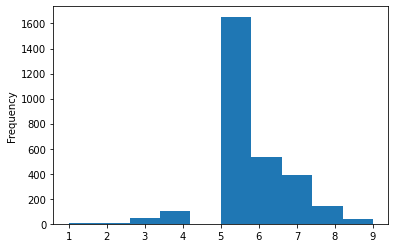

In [19]:
mean = houses['Overall Cond'].mean()
median = houses['Overall Cond'].median()

houses['Overall Cond'].plot.hist()
more_representative = 'mean'

print('Mean - ', mean)
print('Median - ', median)

The mean seems more representative and more informative because it captures the
fact that there are more houses rated above 5 than rated under 5. Because of this,
the mean is slightly shifted above 5. 

#### Sensitivity to Changes

lthough it can be argued that it's theoretically unsound to compute the mean for ordinal variables, in the last exercise we found the mean more informative and representative than the median. The truth is that in practice many people get past the theoretical hurdles and use the mean nonetheless because in many cases it's much richer in information than the median.

Let's consider a situation where the mean is arguably a much better choice to measure the average of an ordinal variable. Let's say we're working for an online real estate company which allows customers to buy, sell, and rent houses. The speed on our website is important for all of our customers, and we want to measure how the customers perceive the speed on the website.

We sample randomly 10 customers and have them assess the following sentence: "The website is very fast, usually a new page loads in less than a second". The customers can choose between the following answers, which we plan to code under the hood with numbers between 1 and 5:

![title](./img/median/median_6.png)

The median is still 2, and it suggests that nothing changed. The mean, however, went up to 3, suggesting that the changes our engineers made have had a positive effect. Unlike the median, the mean is sensitive to small changes in the data, and this property is what makes it more useful in this case.

It should be clear by now that whether we should use the mean for ordinal data is contentious. In practice, you should be flexible and make your choice on a case by case basis. Also, you are not constrained to choose one metric or the other — you can choose both the mean and median to describe a distribution.